In [1]:
from eofs.standard import Eof
import netCDF4 as nc
import numpy as npy
import matplotlib.pyplot as plt
import pandas as pd

from utils.const import LATS_PREC, LONS_PREC, YEAR_E, YEAR_L
from utils.func import csv_to_masked_array as ctm
from utils.func import plot_to_map as ptm

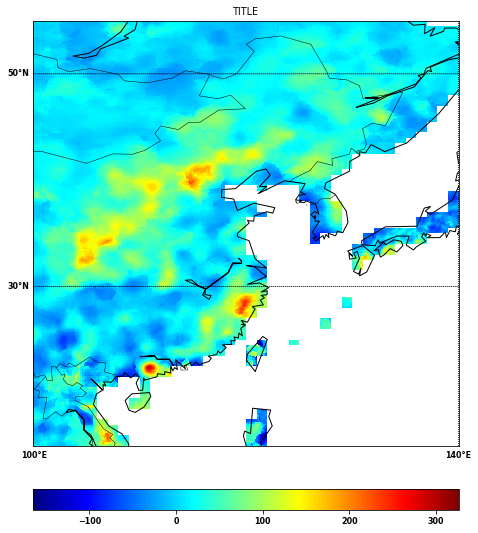

In [2]:
summer_prec = ctm("./precipitation_season_average/summer/1992.csv", type_="prec")
for i in range(1993, 2018):
    y = ctm("./precipitation_season_average/summer/{}.csv".format(i), type_="prec")
    summer_prec = npy.ma.append(summer_prec, y, axis=0)
summer_prec.shape

ptm(LONS_PREC, LATS_PREC, summer_prec[0, :, :]-summer_prec.sum(axis=0)/(2018-1992+1), low_lat=15, up_lat=55, low_lon=100, up_lon=140)

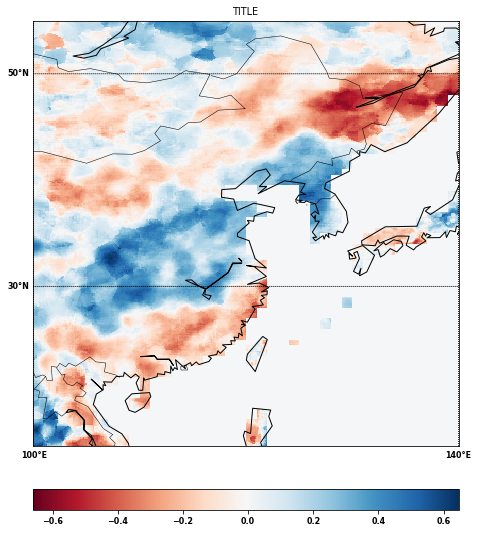

In [16]:
mask = pd.read_csv("./croped_mask_china_land.csv").values
ssh = npy.array([-1.00318762, -0.01425057, -0.73511621,  0.47548067,  0.61314037,
       -2.26075622,  1.09490298,  1.24564134,  0.67402784, -0.3103801 ,
       -0.85976874, -0.02719216, -0.5893381 ,  0.25290076, -0.42839589,
        1.25375321,  0.85077084, -1.23778816,  1.80882442,  0.96674592,
        0.06676005,  0.26074703, -0.32428445, -1.96367113,  0.19043392])
datas = npy.zeros((1800, 3600))
for i in range(1800):
    for j in range(3600):
        if mask[i, j]:
            continue
        rain = npy.squeeze(summer_prec[:-1, i, j])
        mm = npy.array([rain, ssh])
        c = (npy.corrcoef(mm).sum()-2)/2
        datas[i, j] = c

ptm(LONS_PREC, LATS_PREC, datas, low_lat=15, up_lat=55, low_lon=100, up_lon=140, set_cmaps="RdBu")

In [17]:
datas.max()

0.6468219832307638

结论
+ 大部分地区都存在一定相关性，最高相关系数达到了约0.65，或许可以强行说东北、华北、华中、华南地区表现出不同的相关性引到分块均值？